In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('breast-cancer-wisconsin.csv', header=None, delimiter=';')
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Plotting features (2 and 3)

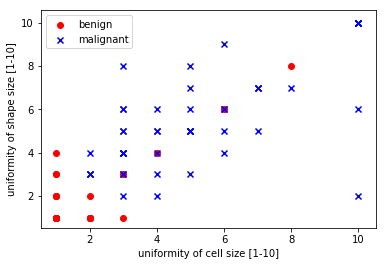

In [70]:
X_benign = data[data[10] == 2][:50]
X_malignant = data[data[10] == 4][:50]

plt.scatter(X_benign[2], X_benign[3],
           color='red', marker='o', label='benign')

plt.scatter(X_malignant[2], X_malignant[3],
           color='blue', marker='x', label='malignant')

plt.xlabel('uniformity of cell size [1-10]')
plt.ylabel('uniformity of shape size [1-10]')
plt.legend(loc='upper left')
plt.show()

In [71]:
# Features chosen: Uniformity of Cell Size (2), Uniformity of Cell Shape (3) and Mitoses (10)

X = data.iloc[:, [2, 3, 9]].values
y = data.iloc[:, -1].values

## Building the MLP classifier with SGD

/home/pedrotorres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


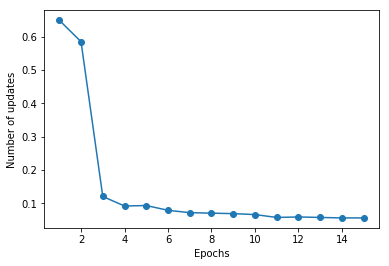

In [114]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', learning_rate_init=0.01, max_iter=1, warm_start=True)

epochs = 15
errors = []

for i in range(epochs):
    errors.append(1 - (clf.fit(X, y).score(X, y)))

plt.plot(range(1, epochs + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Building the MLP regressor with SGD

/home/pedrotorres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


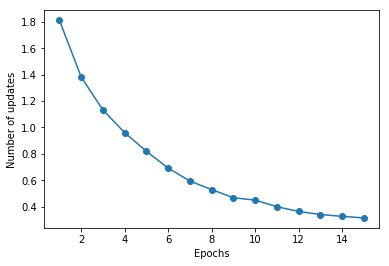

In [116]:
from sklearn.neural_network import MLPRegressor

rgr = MLPRegressor(solver='sgd', learning_rate_init=0.01, max_iter=1, warm_start=True)

epochs = 15
errors = []

for i in range(epochs):
    errors.append(1 - (rgr.fit(X, y).score(X, y)))

plt.plot(range(1, epochs + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()